#**Tarea 1 - Tokenización con Spacy**
# Preprocesamiento de las sentencias y limpieza del texto
1. Eliminación de los números del texto
2. Eliminación de las palabras stopwords
3. Eliminación de la puntuación
4. Eliminació de otros símbolos especiales

##Integrantes:
* Juan Jose Viafara - 2040751
* Diana Marcela Cadena - 2041260
* William Velasco Muñoz - 2042577

In [6]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00


In [2]:
!python3 -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 47.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
from datasets import load_dataset
all_wiki = load_dataset('large_spanish_corpus', name='DGT',split="train")
all_wiki

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for large_spanish_corpus contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/large_spanish_corpus
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.


Generating train split:   0%|          | 0/3168368 [00:00<?, ? examples/s]

Dataset({
    features: ['text'],
    num_rows: 3168368
})

In [3]:
import spacy
import re, string
nlp = spacy.load('es_core_news_sm')
def tokeniza(sentencia):
  #Remove digits
  palabras = sentencia.split()
  newstring = [palabra for palabra in palabras if not palabra.isdigit()]
  newstring = [re.sub(r'[0-9]','', palabra) for palabra in newstring]

  #Remove punctuation
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  newstring = [re_punc.sub('', palabra) for palabra in newstring]

  #Remove symbols
  newstring = [re.sub(r'[!\'?¿¡«»”“′’°—≠≤-≥–]',"",w) for w in newstring]

  #Remove stop words
  sentencia = " ".join(newstring)
  doc = nlp(sentencia)
  filtered_tokens = [token.text for token in doc if not token.is_stop]

  return filtered_tokens
#texto= "Este e5s un 9 ejemplo con spa_cy, 12 3 o.o _n! | love!__"
#tokeniza(texto)

##**Tokenizacion dataset completo**

In [ ]:
from tqdm import tqdm
res = [tokeniza(sentencia) for sentencia in tqdm(all_wiki['text'])]
res

  0%|          | 253/3168368 [00:02<9:22:04, 93.94it/s]

KeyboardInterrupt: 

In [ ]:
resultado = res.copy()

In [ ]:
def clean(list_words):
  clean_words = []
  for words in list_words:
    clean_words.append([re.sub(r'[!\'?¿¡«»”“′’°—≠≤-≥–]',"",w) for w in words])
  return clean_words

In [ ]:
resultado = clean(resultado)
resultado

##**Tokenizacion con subset de sentencias**

In [8]:
subset_all_wiki = all_wiki.select(range(10000))
subset_all_wiki

Dataset({
    features: ['text'],
    num_rows: 10000
})

In [9]:
from tqdm import tqdm
res = [tokeniza(sentencia) for sentencia in tqdm(subset_all_wiki['text'])]
res

100%|██████████| 10000/10000 [01:51<00:00, 89.94it/s]


[['Reglamento', 'Ejecución', 'UE', ' ', 'Comisión'],
 ['noviembre'],
 ['establecen',
  'valores',
  'importación',
  'alzado',
  'determinación',
  'precio',
  'entrada',
  'determinadas',
  'frutas',
  'hortalizas'],
 ['COMISIÓN', 'EUROPEA'],
 ['Visto', 'Tratado', 'Funcionamiento', 'Unión', 'Europea'],
 ['Visto',
  'Reglamento',
  'CE',
  ' ',
  'Consejo',
  'octubre',
  ' ',
  'crea',
  'organización',
  'común',
  'mercados',
  'agrícolas',
  'establecen',
  'disposiciones',
  'específicas',
  'determinados',
  'productos',
  'agrícolas',
  'Reglamento',
  'único',
  'OCM'],
 ['Visto',
  'Reglamento',
  'Ejecución',
  'UE',
  ' ',
  'Comisión',
  'junio',
  ' ',
  'establecen',
  'disposiciones',
  'aplicación',
  'Reglamento',
  'CE',
  ' ',
  'Consejo',
  'sectores',
  'frutas',
  'hortalizas',
  'frutas',
  'hortalizas',
  'transformadas',
  ' ',
  'particular',
  'artículo',
  ' ',
  'apartado'],
 ['Considerando'],
 ['Reglamento',
  'Ejecución',
  'UE',
  ' ',
  'establece',
  '

In [10]:
sentences = []
diccionario = {}

for sent in res:
    sentences.append(sent)
    for word in sent:
        if word not in diccionario:
            diccionario[word] = 1
        else:
            diccionario[word] += 1

In [11]:
print ("numero de oraciones presentes en el corpus: " + str(len(sentences)))
print ("                 numero de palabras unicas: " + str(len(diccionario)))

numero de oraciones presentes en el corpus: 10000
                 numero de palabras unicas: 12492


In [ ]:
def read_sentences_from_txt(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        sentences = [line.split() for line in file]
    return sentences

sentences = read_sentences_from_txt('/content/archivo.txt')

# Embeddings de las palabras del dataset DGT
En esta parte usamos la librería de Gensim para  vectorizar el conjunto de palabras de DGT. Se importan las librerías de Fasttext y Word2vec.

In [13]:
!pip install gensim
from gensim.models import FastText
from gensim.test.utils import common_texts
from gensim.models.word2vec import Word2Vec

# 1.1 Vectorización usando Fasttext

La paremetrización nos permite definir el tamaño del vector o embedding que es de 300, la ventana de contexto a la palabra centro  es de 3. En este caso las sentencias de DGT se agregan al modelo de FAsttext  através de build_vocab.

In [ ]:
model = FastText(vector_size=300, window=3, min_count=1)  # instantiate
model.build_vocab(corpus_iterable=sentences[1:300])

Creado el modelo con Fasttext podemos ver cuáles son las palabras más similares a las palabras "presidente","Importación","Europea","permita", "Madrid", "Bogotá"

In [ ]:
model.wv.most_similar('presidente')

[('presión', 0.4649088382720947),
 ('presente', 0.3740032911300659),
 ('ambiente', 0.3139362037181854),
 ('expresamente', 0.2579598128795624),
 ('temporalmente', 0.25728070735931396),
 ('preferente', 0.25687313079833984),
 ('prevé', 0.25376176834106445),
 ('presentes', 0.2533876895904541),
 ('frente', 0.25208815932273865),
 ('suficiente', 0.2431100606918335)]

In [ ]:
model.wv.most_similar('Europea')

[('Europeas', 0.7353113293647766),
 ('Europeo', 0.6451233625411987),
 ('europea', 0.6046354174613953),
 ('Europa', 0.4419653117656708),
 ('europeas', 0.44187650084495544),
 ('audacia', 0.18007956445217133),
 ('atajar', 0.16870291531085968),
 ('Artículo', 0.1667531132698059),
 ('Barbuda', 0.16122117638587952),
 ('artículo', 0.15728387236595154)]

In [ ]:
model.wv.most_similar('permita')

[('permite', 0.6200747489929199),
 ('permiten', 0.5581557750701904),
 ('permitidas', 0.5056708455085754),
 ('necesita', 0.3000287413597107),
 ('necesidades', 0.20763668417930603),
 ('Vigilancia', 0.16623379290103912),
 ('necesidad', 0.16053767502307892),
 ('período', 0.16001193225383759),
 ('concedido', 0.1584167331457138),
 ('negativos', 0.15712139010429382)]

In [ ]:
model.wv.most_similar('Madrid')

[('Recuperación', 0.18330322206020355),
 ('Vicente', 0.17160357534885406),
 ('destinadas', 0.16519714891910553),
 ('permitidas', 0.1503838151693344),
 ('determinadas', 0.14668327569961548),
 ('encuadrarla', 0.14665013551712036),
 ('global', 0.14105457067489624),
 ('Madagascar', 0.13817209005355835),
 ('peligro', 0.13730372488498688),
 ('recuperación', 0.13634222745895386)]

In [ ]:
model.wv.most_similar('Bogotá')

[('intensificará', 0.16889849305152893),
 ('ADOPTADO', 0.1619143933057785),
 ('Número', 0.1551896184682846),
 ('alcance', 0.15116900205612183),
 ('provocados', 0.1410260796546936),
 ('Kosovo', 0.1353117972612381),
 ('miembro', 0.13409151136875153),
 ('página', 0.13244237005710602),
 ('significa', 0.13111209869384766),
 ('propuestos', 0.1258520931005478)]

La paremetrización nos permite definir el tamaño del vector o embedding que es de 1 millon, la ventana de contexto a la palabra centro  es de 3. En este caso las sentencias de DGT se agregan al modelo de FAsttext  através de build_vocab.

In [ ]:
model2 = FastText(vector_size=1000000, window=3, min_count=1)  # instantiate
model2.build_vocab(corpus_iterable=sentences[1:1000000])

La paremetrización nos permite definir el tamaño del vector o embedding que es de dataset completo, la ventana de contexto a la palabra centro  es de 3. En este caso las sentencias de DGT se agregan al modelo de FAsttext  através de build_vocab.

# 1.2 Vectorización usando Word2vec

La paremetrización nos permite definir el tamaño del vector o embedding que es de 300, la ventana de contexto a la palabra centro  es de 3. En este caso las sentencias de DGT  se asignan dentro del modelos mediante la asignación sentences=sentences.

In [14]:
model1 = Word2Vec(sentences=sentences, vector_size=300, window=5, min_count=1, workers=4)

In [15]:
model1.wv.most_similar('presidente')

[('aviación', 0.9989054799079895),
 ('Fondo', 0.9988552927970886),
 ('principios', 0.9985610246658325),
 ('comunes', 0.9985542893409729),
 ('recomendación', 0.998397171497345),
 ('miembros', 0.9983797669410706),
 ('respecta', 0.9983398914337158),
 ('decisión', 0.9983012080192566),
 ('programa', 0.9982302188873291),
 ('transparencia', 0.9982176423072815)]

In [16]:
model1.wv.most_similar('Europea')

[('Oficial', 0.9919187426567078),
 ('Diario', 0.9905094504356384),
 ('Comunidad', 0.9861008524894714),
 ('Unión', 0.9856889843940735),
 ('publicación', 0.9820677638053894),
 ('Confederación', 0.9743516445159912),
 ('anejo', 0.9722304940223694),
 ('Militar', 0.9716078639030457),
 ('vigésimo', 0.9693946242332458),
 ('Argentina', 0.9668858647346497)]

In [19]:
model1.wv.most_similar('permita')

[('notificación', 0.9981620907783508),
 ('dicha', 0.9981505870819092),
 ('coordinación', 0.9980911612510681),
 ('objetivos', 0.9980226159095764),
 ('decisiones', 0.9980105757713318),
 ('pertinentes', 0.9979783296585083),
 ('conclusiones', 0.9979575872421265),
 ('legislación', 0.9979476928710938),
 ('niveles', 0.9979442358016968),
 ('aplicará', 0.9979439973831177)]

In [17]:
model1.wv.most_similar('Madrid')

KeyError: "Key 'Madrid' not present in vocabulary"

In [18]:
model1.wv.most_similar('Bogotá')

KeyError: "Key 'Bogotá' not present in vocabulary"

#  2. Creación del archivo de las palabras vectorizadas con Fasttext

En esta parte la idea es crear un archivo .txt con todas las palabras vectorizadas de DGT usando Fasttext y Wor2vec.

In [20]:
#!pip3 install -U gensim
#import os
#import sys
import multiprocessing
import pickle
from gensim.models import FastText
num_features = [300]                      #Dimensionality of the resulting word vectors
min_word_count = 1
sg=1                      #Minimum word count threshold
num_workers = multiprocessing.cpu_count() #Number of threads to run in parallel
context_size = 5                          #Context window length
seed = 1
for p in num_features:
    fasttext_model = FastText(
        sentences=sentences,
        vector_size=300,
        window=context_size,
        min_count=min_word_count,
        workers=num_workers,
        sg=1                              #skipgram
    )

    fasttext_model.wv.save_word2vec_format('DGT_fasttext_skip_model11_' + str(p) +  '.txt', binary=False)

    #del fasttext_model

# 2.2 Creación del archivo .txt de de las palabras vectorizadas con Word2vec

In [21]:
for p in num_features:
  word2vex_model = Word2Vec(
      sentences=sentences,
      vector_size=300,
      window=context_size,
      min_count=min_word_count,
      workers=seed
  )

word2vex_model.wv.save_word2vec_format('text_word2vec_skin_model_' + str(num_features[0]) +  '.txt', binary=False)

# 3. Visualización de los vectores  de palabras de DGT

En esta parte se usa [Tsne](https://datascientest.com/es/comprende-el-algoritmo-t-sne-en-3-pasos) para vizualizar un conjunto de vectores del conjunto de sentencias de palabras. Primero se obteniene el modelo  de vectorización usando Word2vec y luego se grafican un número de vectores corespondientes a las palabras de 20 sentencias  de DGT.  En el plano cartesiano  se vizualizan la similaridad de las palabras manteniendo  la dimensión de embedding de 300. Las librerías de Tsne permiten la reducción de la dimensionalidad manteniendo las propiedades de similaridad entre las palabras según el método de Word2vec.

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Función para entrenar modelos Word2Vec
def entrenar_modelo(dim, n_senteces):
    modelo = Word2Vec(sentences=sentences[:n_senteces], vector_size=dim, window=3, sg=0, min_count=1)
    return modelo

def visualizar_tsne(modelo, dim, perplexity=30):
    # Obtener vectores de palabras y palabras
    vectores = modelo.wv.vectors
    palabras = modelo.wv.index_to_key

    # Aplicar t-SNE para reducción de dimensionalidad a 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    vectores_2d = tsne.fit_transform(vectores)

    # Visualizar todas las palabras en el plano cartesiano
    plt.figure(figsize=(10, 8))
    for palabra, (x, y) in zip(palabras, vectores_2d):
        plt.scatter(x, y)
        plt.text(x, y, palabra, fontsize=9)
    plt.title(f'Visualización t-SNE - Dimensión {dim}')
    plt.show()

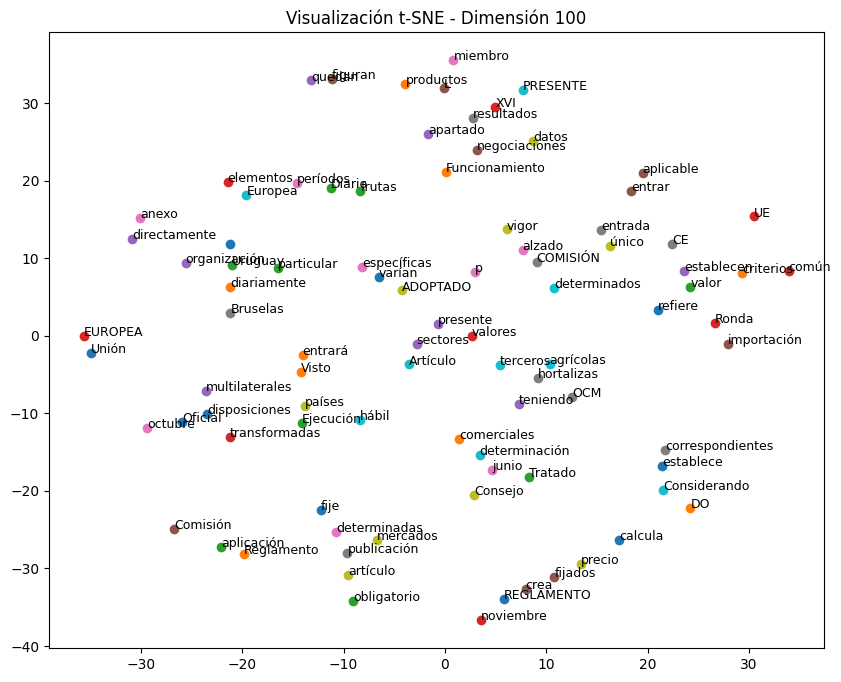

In [29]:
# Visualizar para el modelo de dimensión 300 con perplexity ajustada
modelo_dim_100 = entrenar_modelo(100, 20)
visualizar_tsne(modelo_dim_100, 100, perplexity=5)

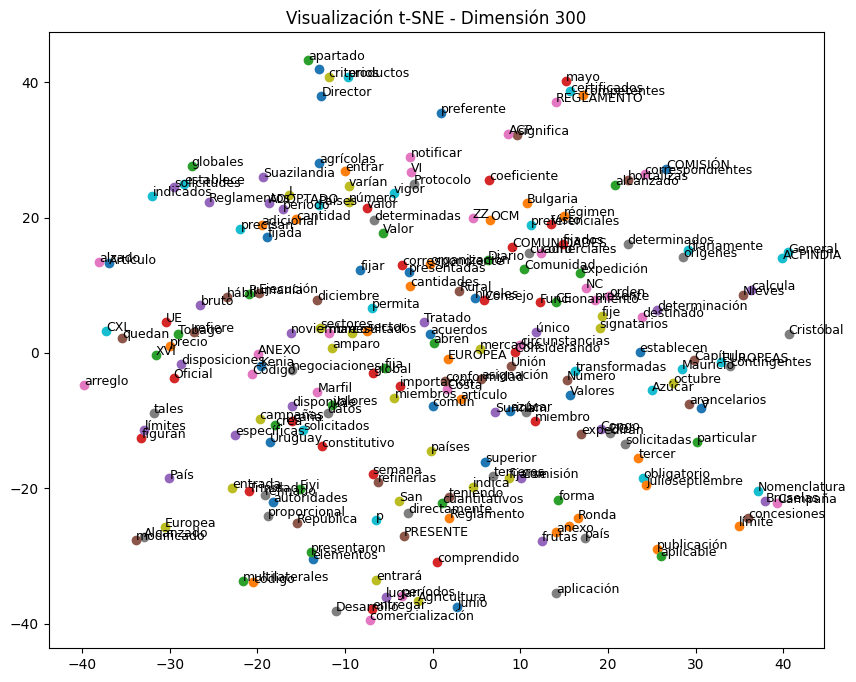

In [30]:
modelo_dim_300 = entrenar_modelo(300, 100)
visualizar_tsne(modelo_dim_300, 300, perplexity=5)

In [33]:
def entrenar_modelo_ft(dim, n_sentences):
    modelo2 = FastText(vector_size=300, window=3, min_count=1)  # instantiate
    modelo2.build_vocab(corpus_iterable=sentences[:n_sentences])
    return modelo2

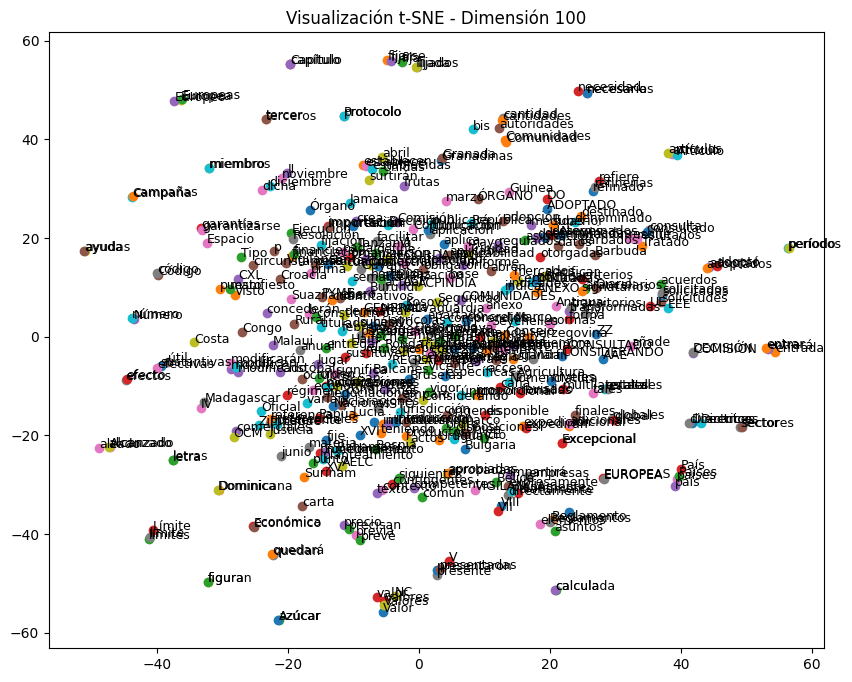

In [34]:
modelo_ft_dim_100 = entrenar_modelo_ft(100,150)
visualizar_tsne(modelo_ft_dim_100, 100, perplexity=5)

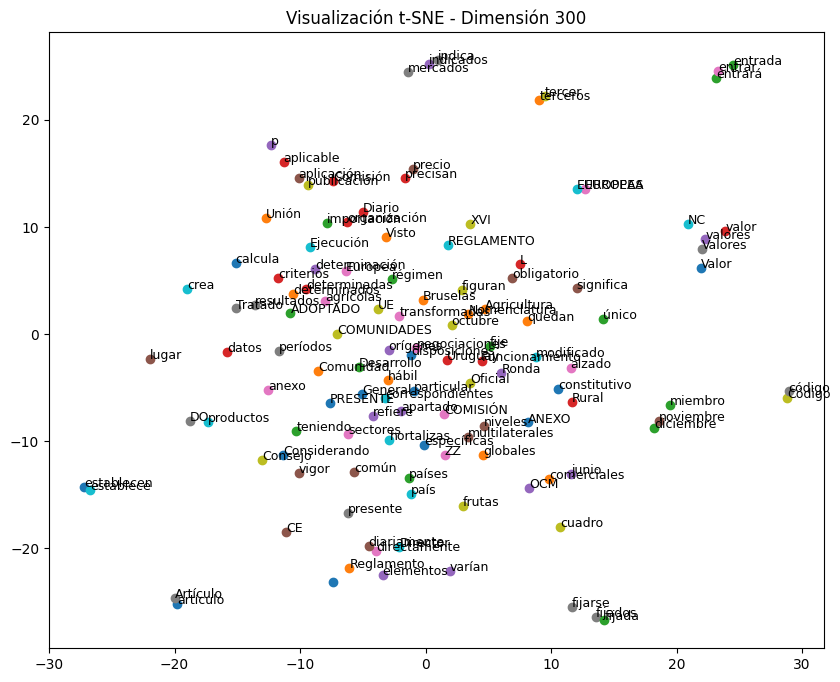

In [32]:
modelo_ft_dim_300 = entrenar_modelo_ft(300,50)
visualizar_tsne(modelo_ft_dim_300, 300, perplexity=5)